# Kaggle_Titanic
## Goal
**Build a predictive model that answers the question: "What sorts of people were more likely to survice?" using passenger data (ie name, age, gender, socio-economic class, etc).**   
## The dataset
- The dataset include passenger information like name, age, gender, socio-economic class, etc.  
- `df_.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.  
- The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.  
- Using the patterns you find in the `df_.csv` data, predict whether the other 418 passengers on board (found in `test.csv`) survived.  
## Submission File Format  
- **PassengerId (sorted in any order)**  
- **Survived (contains your binary predictions: 1 for survived, 0 for deceased)**  


In [52]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split

In [53]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Data processing

Nạp bảng

In [54]:
df = pd.read_csv("data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Kiểm tra thông tin của bảng

In [55]:
"""
Survey the variables we have for each person.

PassengerId - Unique identifiers for each passenger.
Survived - If the passenger survived. 0 = No, 1 = Yes
Pclass - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
Name - Name of the passenger. String
Sex - Sex of the passenger. "male" or "female"
Age - Age of the passenger. Integer
SibSp - # of siblings/spouses passenger had on board. Integer
Parch - # of parents/children passenger had on board. Integer
Ticket - Ticket number. String
Fare - Passenger's fare. Float
Cabin - Cabin number. String
Embarked - Port of embarkation. 
        C = Cherbourg, Q = Queenstown, S = Southampton
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Kiểm tra dữ liệu NULL có trong bảng

In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Tạo 1 dataframe mới để dùng

In [58]:
df_ = df.copy()

In [59]:
# Các cột SibSp và Parch chưa rõ nghĩa vì vậy chúng ta cần làm rõ ở đây

df_ = df_.rename(index = str, columns={"SibSp": "SiblingsSpouses", "Parch": "ParentsChildren"})
df_

,PassengerId,Survived,Pclass,Name,Sex,Age,SiblingsSpouses,ParentsChildren,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
df_.set_index(df_.PassengerId, inplace=True)
df_.drop('PassengerId', axis=1, inplace=True)

## 1. Feature Classification: Categorical and Numerical

- This helps us select the appropriate plots for visualization

<b> Which features are categorical? </b>
- Nominal, ordinal, ratio, interval
- The classify the samples into sets of similar sample 

<b> Which features are numerical? </b>
- Discrete, continuous, time series
- These values change from sample to sample

In [62]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Name             891 non-null    object 
 3   Sex              891 non-null    object 
 4   Age              714 non-null    float64
 5   SiblingsSpouses  891 non-null    int64  
 6   ParentsChildren  891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Cabin            204 non-null    object 
 10  Embarked         889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- Categorical: Survived, Sex, Embarked, Pclass, Sibp, Parch
- Numerical: Age, Fare
- Mix types of data: Ticket, Cabin
- Contain Error/typo: Name
- Blank or Null: Cabin > Age > Embarked

In [63]:
converted = ['Survived', 'Pclass', 'SiblingsSpouses', 'Sex', 'Embarked', 'ParentsChildren']

def convert_cate(new_df, feature):
    for feature in feature:
        new_df[feature] = new_df[feature].astype('category')

convert_cate(df_, converted)

In [64]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Survived         891 non-null    category
 1   Pclass           891 non-null    category
 2   Name             891 non-null    object  
 3   Sex              891 non-null    category
 4   Age              714 non-null    float64 
 5   SiblingsSpouses  891 non-null    category
 6   ParentsChildren  891 non-null    category
 7   Ticket           891 non-null    object  
 8   Fare             891 non-null    float64 
 9   Cabin            204 non-null    object  
 10  Embarked         889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [65]:
df_.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


<b>Distribution of Categorical Features</b>

In [66]:
df_.describe(include=['category'])

,Survived,Pclass,Sex,SiblingsSpouses,ParentsChildren,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


<b> NULL Values</b>  
Có các cách chính sau để xử lý dữ liệu NULL  
- Xóa bỏ các giá trị null đi  --> Sử dụng khi giá trị null dưới 5% tổng giá trị của cả cột.
- Thay thế các giá trị null đó bằng giá trị mean, std (giá trị xuất hiện nhiều nhất trong bảng) --> trường hợp còn lại.

In [67]:
df_.isnull().sum()

Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SiblingsSpouses      0
ParentsChildren      0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
dtype: int64

In [68]:
print((df_.Age.isnull().sum()/df_.Age.sum())*100)
# print((df_.Cabin.isnull().sum()/df_.Cabin.sum())*100)

0.8347021033078255


<b> Mean </b>

In [69]:
mean_age = round(df_.Age.mean(), 2)
nums_replace_age = round(df_.Age.sum()/df_.shape[0], 2)
print(mean_age, nums_replace_age)

29.7 23.8


In [70]:
Age_fixed = df_.Age.replace(np.nan, round(mean_age, 2))
Age_fixed

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    29.7
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [71]:
df_.Age = Age_fixed
df_.isnull().sum()

Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SiblingsSpouses      0
ParentsChildren      0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
dtype: int64

In [72]:
gender = {"male": 0, "female": 1}
df_.Sex = [gender[item] for item in df_.Sex]

## 2. Data analysis

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

In [74]:
df_['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [76]:
df_['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [77]:
df_['Sex'].value_counts().to_frame()

,count
Sex,
0,577
1,314


In [79]:
new_df = df_.copy()
data = df_.astype(str)

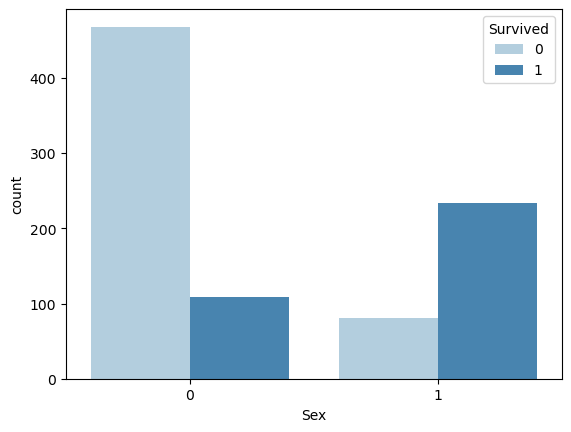

In [80]:
sns.countplot(data=data, x='Sex', hue='Survived', palette='Blues');
plt.show()

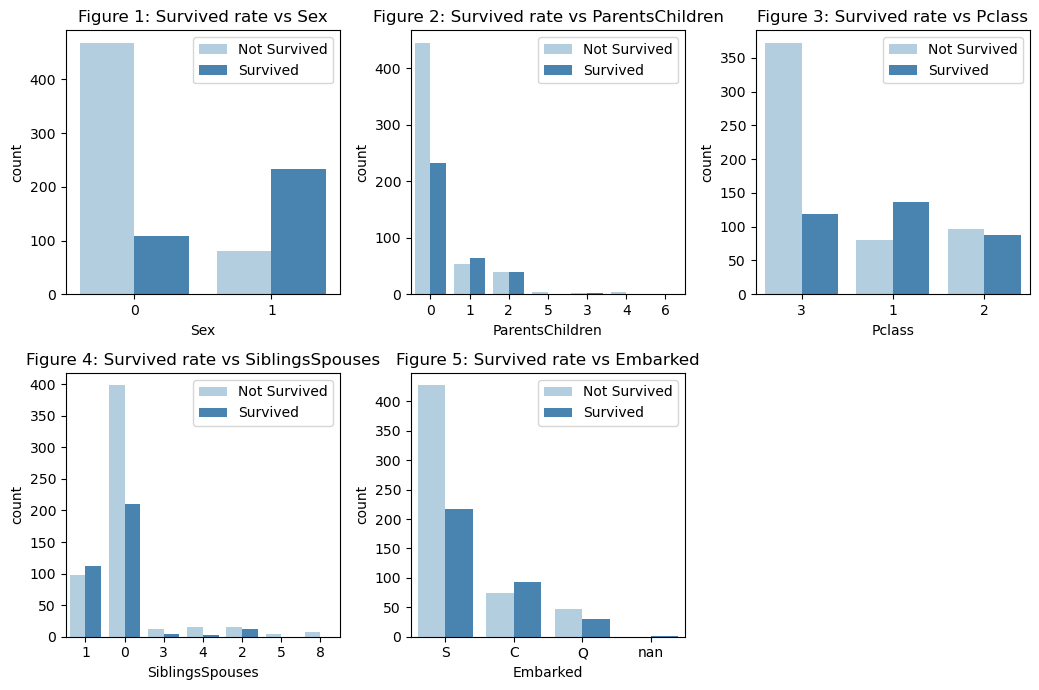

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

colums = ['Sex', 'ParentsChildren', 'Pclass', 'SiblingsSpouses', 'Embarked']

rows, cols = 2, 3
fig, ax = plt.subplots(rows, cols, figsize=(cols*3.5, rows*3.5))

for r in range(rows):
    for c in range(cols):
        i = r*cols + c
        if i < len(colums):
            ax_i = ax[r, c]
            sns.countplot(data=data, x=colums[i], hue='Survived', palette='Blues', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survived rate vs {colums[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

# Xóa subplot cuối cùng nếu không cần thiết
ax.flat[-1].set_visible(False)

plt.tight_layout()
plt.show()

<b>Age</b>

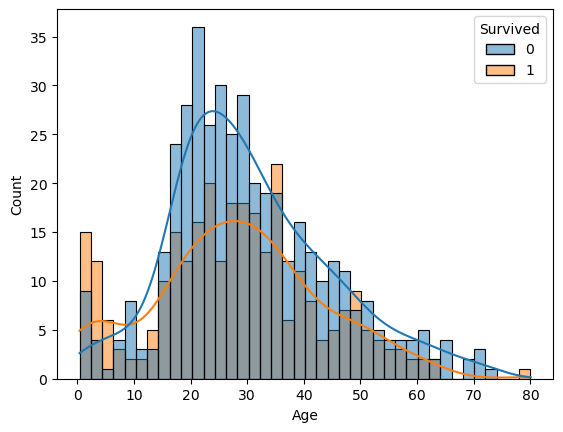

In [82]:
sns.histplot(data=df, x='Age', hue='Survived', bins=40, kde=True);

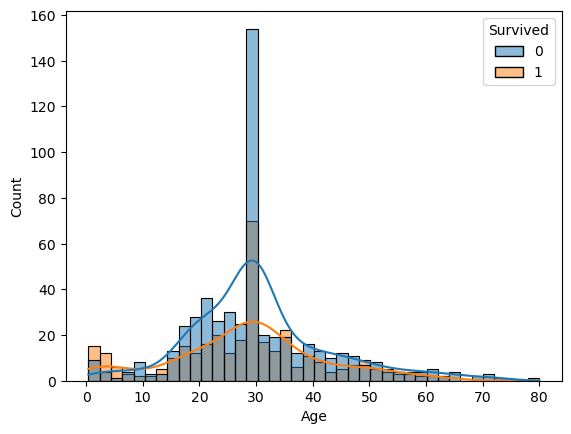

In [84]:
sns.histplot(data=df_, x='Age', hue='Survived', bins=40, kde=True);

<b>Fare</b>

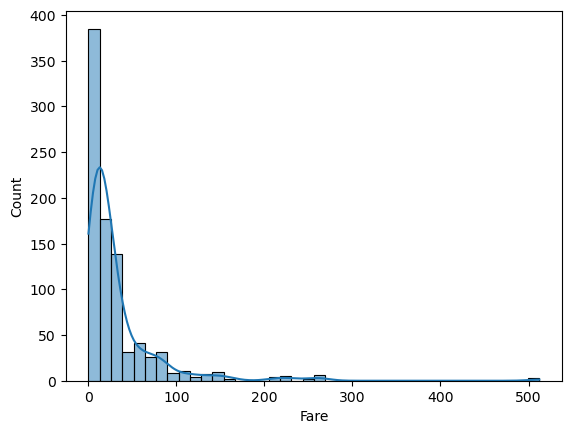

In [85]:
sns.histplot(data=df, x='Fare', bins=40, kde=True);

In [ ]:
# figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
# new_df.groupby(new_df['Pclass'].astype(int))[new_df['Survived'].astype(int)].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
# new_df.groupby('SiblingsSpouses')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
# new_df.groupby('ParentsChildren')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
# new_df.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
# new_df.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
# sns.boxplot(x="Survived", y="Age", data=new_df,ax=axesbi[1,1])
# sns.boxplot(x="Survived", y="Fare", data=new_df,ax=axesbi[1,2])

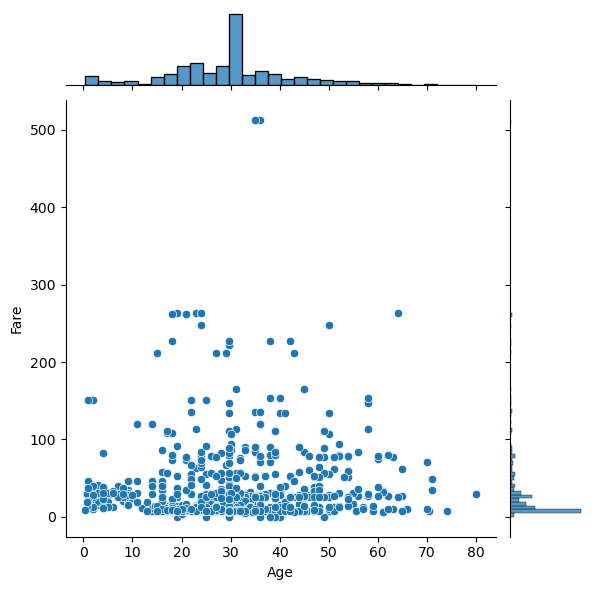

In [86]:
sns.jointplot(x="Age", y="Fare", data=new_df);

## 3. Features engineering and Data Wrangling

<b>Name</b>

## 4. Model selection

## 5. Evualate